In [1]:
from mesh import *

from VPINN_tri_final import *

from PROBDEF import PROBDEF


#TODO: change all types
#TODO: H1 ERROR ,interpolate error with line 
#TODO: bound error after reading the paper 

import os; os.environ['CUDA_VISIBLE_DEVICES'] = '-1';

2023-11-28 23:54:21.151618: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-28 23:54:21.153649: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 23:54:21.192447: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 23:54:21.192944: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 23:54:22.102110: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co


my_types lib imported

generate mesh lib imported

interpolator_lib imported

settings_lib imported 



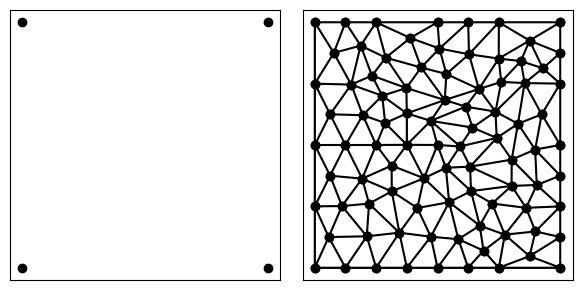

In [2]:
initializer=tf.keras.initializers.GlorotUniform(seed=50)


domain=((0,0),(1,0),(1,1),(0,1))

mesh=generate_mesh(domain,0.01)



In [3]:
tfk=tf.keras
tfkl=tf.keras.layers

In [4]:
#glorot uniform is the key 
model = tfk.models.Sequential()
model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

In [5]:
print(model.summary())
#print(model.input_shape)
#print(model.output_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5301 (41.41 KB)
Trainable params: 5301 (41.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [6]:
N_tests = 2
N_elements = [5, 5]

pb=PROBDEF()

params = {'scheme': 'VPINNs',
            'NN_struct': [2] + [5] * 3 + [1],
            'var_form': 1,
            'n_elements': tuple(N_elements),
            'n_test': [N_elements[0]*[N_tests], N_elements[1]*[N_tests]],
            'n_quad': 50,
            'n_bound': 80, # for every edge 
            'n_residual': 100,
            'domain': ((0.0, 1.0), (0.0, 1.0)),
            'Opt_Niter': 15000 + 1,
            'delta_test': 0.01,
            'N_test':N_tests}

In [7]:
vp=VPINN(pb,params,mesh,model)

-->mesh : 
     n_triangles :  150
     n_vertices  :  88
     n_edges     :  237
     h_max           :  0.25
     h_min           :  0.0895721626833764
-->test_fun      : 
     order       :  2
     dof         :  297


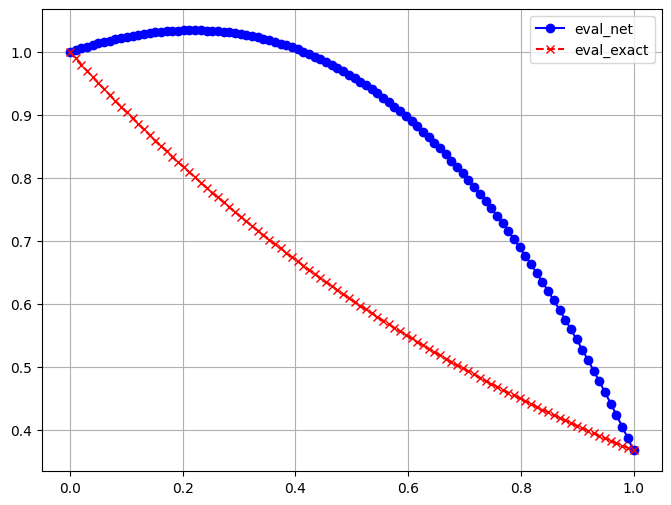

In [10]:
x=np.linspace(0,1,100,dtype=np.float64)

def u_exact(x,y):
    return np.cos(np.pi*x)*np.exp(-y)


eval_exact=[u_exact(0.0,x[i]) for i in range(len(x))]

eval_net=[vp.u_NN_BC______________(0.0,x[i]) for i in range(len(x))]

eval_exact=np.array(eval_exact)
eval_net=np.array(eval_net)


plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the data
plt.plot(x, eval_net, label='eval_net', linestyle='-', marker='o', color='b')
plt.plot(x, eval_exact, label='eval_exact', linestyle='--', marker='x', color='r')
plt.grid()
plt.legend()

In [25]:
#print(find_h(mesh)) #biggest and smaller of the edges 
history=vp.train(500,0.01)

Iteration: 0 loss: 0.001594016544029 time: 0.02792668342590332
Iteration: 10 loss: 0.001521205301333 time: 0.31899237632751465
Iteration: 20 loss: 0.001419877227698 time: 0.24945402145385742
Iteration: 30 loss: 0.001343151336814 time: 0.23886942863464355
Iteration: 40 loss: 0.001358962787733 time: 0.2539384365081787
Iteration: 50 loss: 0.002406514877455 time: 0.2555973529815674
Iteration: 60 loss: 0.002939043577605 time: 0.24690771102905273
Iteration: 70 loss: 0.001918470530801 time: 0.23239994049072266
Iteration: 80 loss: 0.001485994236390 time: 0.25247716903686523
Iteration: 90 loss: 0.001316380814476 time: 0.22814154624938965
Iteration: 100 loss: 0.001268371244091 time: 0.22007179260253906
Iteration: 110 loss: 0.002496442520736 time: 0.22320008277893066
Iteration: 120 loss: 0.001730097284639 time: 0.22277331352233887
Iteration: 130 loss: 0.001371036306367 time: 0.224379301071167
Iteration: 140 loss: 0.001245015423302 time: 0.2225666046142578
Iteration: 150 loss: 0.001209556002441 ti

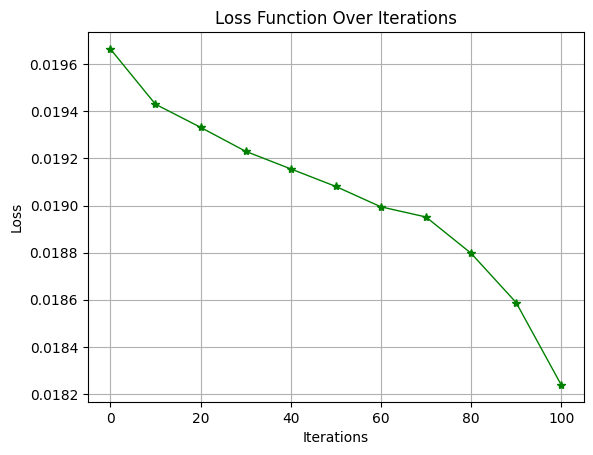

In [16]:
iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 10 iterations

plt.plot(iterations, history, marker='*',color='green',linewidth=1)
plt.title('Loss Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

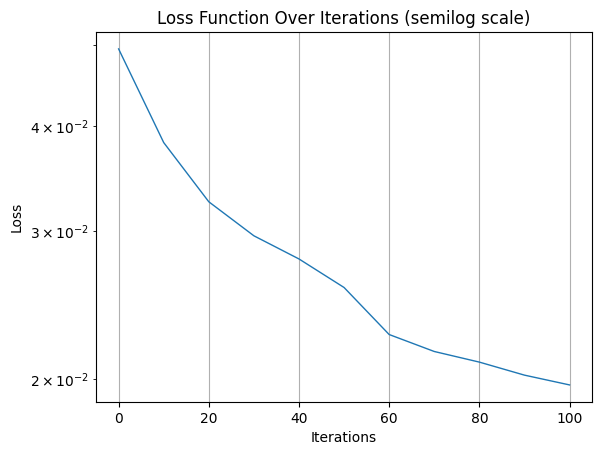

In [13]:
plt.semilogy(iterations, history,linewidth=1)
plt.title('Loss Function Over Iterations (semilog scale)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

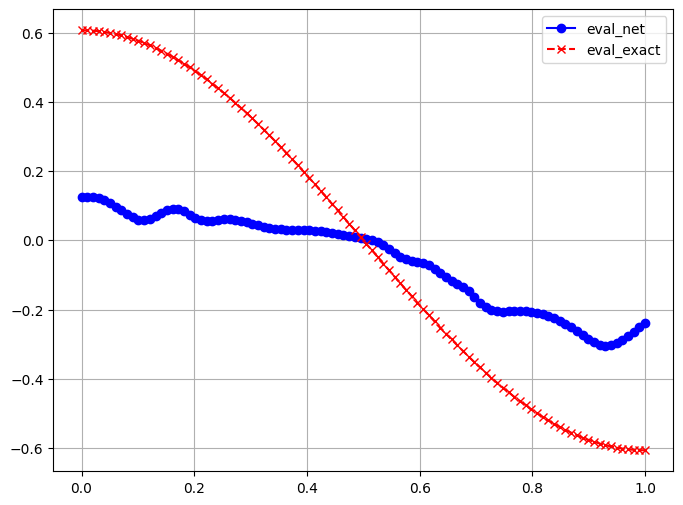

In [27]:
x=np.linspace(0,1,100,dtype=np.float64)

def u_exact(x,y):
    return np.cos(np.pi*x)*np.exp(-y)


eval_exact=[u_exact(x[i],0.5) for i in range(len(x))]

eval_net=[vp.u_NN_BC______________(x[i],0.5) for i in range(len(x))]

eval_exact=np.array(eval_exact)
eval_net=np.array(eval_net)


plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the data
plt.plot(x, eval_net, label='eval_net', linestyle='-', marker='o', color='b')
plt.plot(x, eval_exact, label='eval_exact', linestyle='--', marker='x', color='r')
plt.grid()
plt.legend()

#if you want reproducibility put a seed


In [ ]:
x_eval=tf.reshape(vp.xy_quad_total,(-1,2))
print(vp.NN_imposeBC(x_eval))

tf.Tensor(
[[-0.05834348]
 [-0.20812399]
 [-0.42135267]
 ...
 [-0.1435833 ]
 [-0.01433361]
 [ 0.19874749]], shape=(2400, 1), dtype=float64)


In [ ]:
1/np.e

0.36787944117144233

In [ ]:
## Add surface plot
N = 50
x=np.linspace(0,1,N,dtype=np.float32)
XX,YY = np.meshgrid(x,x)
xx = XX.flatten()
yy = YY.flatten()

X = np.vstack((xx,yy)).transpose()
Z = [vp.u_NN_BC(x[0],x[1]) for x in X]

z = np.array(Z).flatten().reshape((N,N))

AttributeError: 'VPINN' object has no attribute 'u_NN_BC'

Text(0.5, 0.92, 'NN solution')

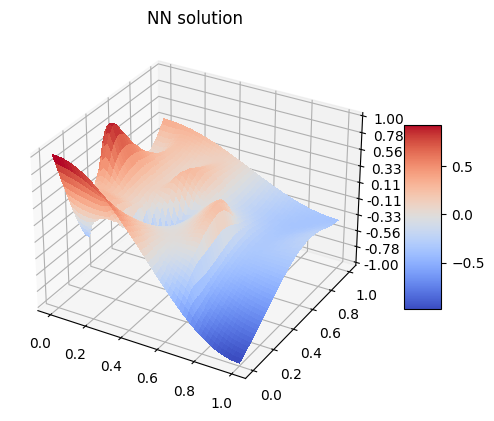

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(XX, YY, z, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 0)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('NN solution')

In [ ]:
#integration
from scipy.integrate import dblquad
integral,error=dblquad(lambda x,y: (u_exact(x,y)-vp.u_NN_BC(x,y))**2, 0.0, 1.0,0.0, 1.0)

L2_error=np.sqrt(integral)
print(L2_error,error)


def L2_error(x, y):

    u_ex = lambda x, y: tf.cos(np.pi*(x+0.5))*tf.sin(np.pi*y)

    # Find the exact solution
    u_ex = u_ex(x, y)

    # Find the NN solution
    u_NN = vp.u_NN_BC(x, y)

    # Find the difference between exact and NN 
    return (u_ex - u_NN)**2

L2_2, int_error_L2 = dblquad(L2_error, 0.0, 1.0, 0.0, 1.0)
L2_error=np.sqrt(L2_2)

KeyboardInterrupt: 

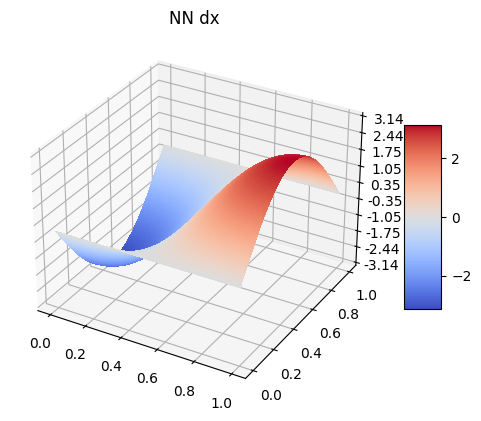

In [ ]:
x = np.linspace(0, 1, 150, dtype=np.float64)
x, y = np.meshgrid(x,x)

u_ex_dx = lambda x, y: -np.pi*tf.sin(np.pi*(x + 0.5))*tf.sin(np.pi*y)
u_ex_dy = lambda x, y: np.pi*tf.cos(np.pi*(x + 0.5))*tf.cos(np.pi*y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, u_ex_dx(x,y), rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 0)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('NN dx')
plt.show()

In [ ]:
def semi_H1_error(x, y):

    u_ex_dx = lambda x, y: -np.pi*tf.sin(np.pi*(x + 0.5))*tf.sin(np.pi*y)
    u_ex_dy = lambda x, y: np.pi*tf.cos(np.pi*(x + 0.5))*tf.cos(np.pi*y)

    # Find the gradient of the exact solution
    grad_ex = np.reshape(np.vstack([u_ex_dx(x, y), u_ex_dy(x, y)]), (-1, 2))

    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.reshape(tf.stack([x,y]), (-1,2)))

    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    # Return dx_error^2 + dy_error^2
    return pw_diff[:,0]*pw_diff[:,0] + pw_diff[:,1]*pw_diff[:,1]

semi_H1_err2, int_error_semi_H1 = dblquad(semi_H1_error, 0.0, 1.0, 0.0, 1.0, epsabs=5E-6)
semi_H1_err = np.sqrt(semi_H1_err2)
H1_err = np.sqrt(L2_error**2 + semi_H1_err**2)

print(f"L2 error: {L2_error} ({int_error_L2})")
print(f"semi H1 error: {semi_H1_err} ({int_error_semi_H1})")
print(f"H1 error: {H1_err}")


TypeError: in user code:

    File "/home/mariano/Documenti/progetto serio/IVPINN/VPINN_clean_with_BC/VPINN_tri_final.py", line 148, in eval_grad_NN_BC  *
        res=self.NN_imposeBC(x)
    File "/home/mariano/Documenti/progetto serio/IVPINN/VPINN_clean_with_BC/VPINN_tri_final.py", line 135, in NN_imposeBC  *
        return eval*boundary + self.dirichlet(x)

    TypeError: Input 'y' of 'Mul' Op has type float32 that does not match type float64 of argument 'x'.


-->mesh : 
     n_triangles :  2
     n_vertices  :  4
     n_edges     :  5
     h_max           :  1.4142135623730951
     h_min           :  1.0
-->test_fun      : 
     order       :  2
     dof         :  1


2023-11-27 18:32:40.301510: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 18:32:40.304297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 217.9626111322 time: 1.318192481994629
Iteration: 10 loss: 129.0452366343 time: 0.031710147857666016
Iteration: 20 loss: 65.1076664168 time: 0.030249834060668945
Iteration: 30 loss: 27.2315158329 time: 0.028016328811645508
Iteration: 40 loss: 9.1409796070 time: 0.029018402099609375
Iteration: 50 loss: 2.2509113734 time: 0.028537988662719727
Iteration: 60 loss: 0.3048659499 time: 0.02709484100341797
Iteration: 70 loss: 0.0022157856 time: 0.0286710262298584
Iteration: 80 loss: 0.0238416507 time: 0.029247522354125977
Iteration: 90 loss: 0.0325577393 time: 0.029955625534057617
Iteration: 100 loss: 0.0169735753 time: 0.03181910514831543
Iteration: 110 loss: 0.0044443606 time: 0.022779226303100586
Iteration: 120 loss: 0.0003715255 time: 0.020251750946044922
Iteration: 130 loss: 0.0000272287 time: 0.01817607879638672
Iteration: 140 loss: 0.0001444994 time: 0.01723027229309082
Iteration: 150 loss: 0.0000915284 time: 0.025053977966308594
Iteration: 160 loss: 0.0000215672 time

2023-11-27 18:32:46.896156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 18:32:46.898406: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 9.6889069739 time: 2.442376136779785
Iteration: 10 loss: 5.7198520333 time: 0.026187658309936523
Iteration: 20 loss: 2.8956834575 time: 0.023426055908203125
Iteration: 30 loss: 1.2304847644 time: 0.025098562240600586
Iteration: 40 loss: 0.4484982552 time: 0.023723602294921875
Iteration: 50 loss: 0.1718441446 time: 0.024687767028808594
Iteration: 60 loss: 0.1086833012 time: 0.024489402770996094
Iteration: 70 loss: 0.1037472182 time: 0.02403116226196289
Iteration: 80 loss: 0.1031558909 time: 0.02694249153137207
Iteration: 90 loss: 0.0997904203 time: 0.0291597843170166
Iteration: 100 loss: 0.0965260576 time: 0.02557086944580078
Iteration: 110 loss: 0.0943798367 time: 0.028768062591552734
Iteration: 120 loss: 0.0928270458 time: 0.02298450469970703
Iteration: 130 loss: 0.0914304330 time: 0.02190232276916504
Iteration: 140 loss: 0.0901078859 time: 0.021457910537719727
Iteration: 150 loss: 0.0888791761 time: 0.020261526107788086
Iteration: 160 loss: 0.0877449979 time: 0.020

2023-11-27 18:32:55.174944: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 18:32:55.177255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 2.1370661475 time: 3.7552714347839355
Iteration: 10 loss: 1.2650269492 time: 0.03786587715148926
Iteration: 20 loss: 0.6454414730 time: 0.037424564361572266
Iteration: 30 loss: 0.2798538796 time: 0.037644147872924805
Iteration: 40 loss: 0.1071616568 time: 0.03751683235168457
Iteration: 50 loss: 0.0456318800 time: 0.03350424766540527
Iteration: 60 loss: 0.0315592527 time: 0.03277468681335449
Iteration: 70 loss: 0.0304518515 time: 0.035138607025146484
Iteration: 80 loss: 0.0302229648 time: 0.034555673599243164
Iteration: 90 loss: 0.0293680063 time: 0.03633475303649902
Iteration: 100 loss: 0.0285823711 time: 0.03148674964904785
Iteration: 110 loss: 0.0280723030 time: 0.029495716094970703
Iteration: 120 loss: 0.0276963522 time: 0.02847146987915039
Iteration: 130 loss: 0.0273539868 time: 0.0298464298248291
Iteration: 140 loss: 0.0270306187 time: 0.028193950653076172
Iteration: 150 loss: 0.0267310783 time: 0.036895751953125
Iteration: 160 loss: 0.0264540556 time: 0.0322527

2023-11-27 18:33:04.905397: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 18:33:04.907881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 2.1370661475 time: 3.720446825027466
Iteration: 10 loss: 1.2650269492 time: 0.04133105278015137
Iteration: 20 loss: 0.6454414730 time: 0.040196895599365234
Iteration: 30 loss: 0.2798538796 time: 0.040734052658081055
Iteration: 40 loss: 0.1071616568 time: 0.04347944259643555
Iteration: 50 loss: 0.0456318800 time: 0.043717145919799805
Iteration: 60 loss: 0.0315592527 time: 0.04340243339538574
Iteration: 70 loss: 0.0304518515 time: 0.04335141181945801
Iteration: 80 loss: 0.0302229648 time: 0.04365038871765137
Iteration: 90 loss: 0.0293680063 time: 0.0426478385925293
Iteration: 100 loss: 0.0285823711 time: 0.03463029861450195
Iteration: 110 loss: 0.0280723030 time: 0.031642913818359375
Iteration: 120 loss: 0.0276963522 time: 0.02764272689819336
Iteration: 130 loss: 0.0273539868 time: 0.027835607528686523
Iteration: 140 loss: 0.0270306187 time: 0.027798891067504883
Iteration: 150 loss: 0.0267310783 time: 0.02704334259033203
Iteration: 160 loss: 0.0264540556 time: 0.027951

2023-11-27 18:33:15.891049: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 18:33:15.893610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.6966345579 time: 6.369099855422974
Iteration: 10 loss: 0.4138246861 time: 0.04870915412902832
Iteration: 20 loss: 0.2129224641 time: 0.05347919464111328
Iteration: 30 loss: 0.0946708076 time: 0.06303977966308594
Iteration: 40 loss: 0.0385053814 time: 0.06811308860778809
Iteration: 50 loss: 0.0180691488 time: 0.05373430252075195
Iteration: 60 loss: 0.0131781049 time: 0.05675029754638672
Iteration: 70 loss: 0.0127055457 time: 0.05604124069213867
Iteration: 80 loss: 0.0125762226 time: 0.047832489013671875
Iteration: 90 loss: 0.0122532936 time: 0.04265928268432617
Iteration: 100 loss: 0.0119718935 time: 0.038141727447509766
Iteration: 110 loss: 0.0117926754 time: 0.04534912109375
Iteration: 120 loss: 0.0116579035 time: 0.047623395919799805
Iteration: 130 loss: 0.0115324319 time: 0.042734384536743164
Iteration: 140 loss: 0.0114135813 time: 0.04072308540344238
Iteration: 150 loss: 0.0113030635 time: 0.040395259857177734
Iteration: 160 loss: 0.0111994318 time: 0.041498422

2023-11-27 18:33:35.444334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 18:33:35.447157: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.1170993215 time: 13.372004985809326
Iteration: 10 loss: 0.0697312422 time: 0.06057572364807129
Iteration: 20 loss: 0.0360809913 time: 0.06606221199035645
Iteration: 30 loss: 0.0163007544 time: 0.06866574287414551
Iteration: 40 loss: 0.0069630996 time: 0.07582426071166992
Iteration: 50 loss: 0.0035848141 time: 0.0722653865814209
Iteration: 60 loss: 0.0027497949 time: 0.06499028205871582
Iteration: 70 loss: 0.0026338493 time: 0.06073451042175293
Iteration: 80 loss: 0.0025901085 time: 0.07472920417785645
Iteration: 90 loss: 0.0025237945 time: 0.06883955001831055
Iteration: 100 loss: 0.0024662301 time: 0.062439680099487305
Iteration: 110 loss: 0.0024270378 time: 0.0734865665435791
Iteration: 120 loss: 0.0023955603 time: 0.07081913948059082
Iteration: 130 loss: 0.0023653523 time: 0.07023382186889648
Iteration: 140 loss: 0.0023364065 time: 0.06997013092041016
Iteration: 150 loss: 0.0023090212 time: 0.07223129272460938
Iteration: 160 loss: 0.0022827229 time: 0.07010960578

2023-11-27 18:34:08.427761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 18:34:08.430098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0218742299 time: 30.330690383911133
Iteration: 10 loss: 0.0130366872 time: 0.15845561027526855
Iteration: 20 loss: 0.0067596774 time: 0.15438055992126465
Iteration: 30 loss: 0.0030737060 time: 0.15575432777404785
Iteration: 40 loss: 0.0013401099 time: 0.1595594882965088
Iteration: 50 loss: 0.0007190166 time: 0.17493844032287598
Iteration: 60 loss: 0.0005678919 time: 0.18608403205871582
Iteration: 70 loss: 0.0005457677 time: 0.18940162658691406
Iteration: 80 loss: 0.0005351734 time: 0.18982720375061035
Iteration: 90 loss: 0.0005208230 time: 0.19265341758728027
Iteration: 100 loss: 0.0005088584 time: 0.17388010025024414
Iteration: 110 loss: 0.0005003871 time: 0.13697147369384766
Iteration: 120 loss: 0.0004930688 time: 0.1684262752532959
Iteration: 130 loss: 0.0004858731 time: 0.18726325035095215
Iteration: 140 loss: 0.0004789311 time: 0.20067691802978516
Iteration: 150 loss: 0.0004722855 time: 0.19185757637023926
Iteration: 160 loss: 0.0004658473 time: 0.189761638641

2023-11-27 18:35:01.440627: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 18:35:01.442641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0164848412 time: 34.142863273620605
Iteration: 10 loss: 0.0097985269 time: 0.12578868865966797
Iteration: 20 loss: 0.0050435840 time: 0.1192328929901123
Iteration: 30 loss: 0.0022635196 time: 0.12001538276672363
Iteration: 40 loss: 0.0009773911 time: 0.11847567558288574
Iteration: 50 loss: 0.0005316709 time: 0.11596989631652832
Iteration: 60 loss: 0.0004322237 time: 0.11583089828491211
Iteration: 70 loss: 0.0004241560 time: 0.11492490768432617
Iteration: 80 loss: 0.0004222306 time: 0.11571049690246582
Iteration: 90 loss: 0.0004158178 time: 0.11428403854370117
Iteration: 100 loss: 0.0004095210 time: 0.1392226219177246
Iteration: 110 loss: 0.0004049392 time: 0.1761612892150879
Iteration: 120 loss: 0.0004012551 time: 0.18039894104003906
Iteration: 130 loss: 0.0003977646 time: 0.18056201934814453
Iteration: 140 loss: 0.0003943143 time: 0.18029570579528809
Iteration: 150 loss: 0.0003909223 time: 0.17684125900268555
Iteration: 160 loss: 0.0003875838 time: 0.1749625205993

2023-11-27 18:36:00.347509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 18:36:00.349695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0119846336 time: 42.746901988983154
Iteration: 10 loss: 0.0071377325 time: 0.12682175636291504
Iteration: 20 loss: 0.0036990857 time: 0.1288127899169922
Iteration: 30 loss: 0.0016823059 time: 0.11812663078308105
Iteration: 40 loss: 0.0007323284 time: 0.11647772789001465
Iteration: 50 loss: 0.0003878206 time: 0.11932563781738281
Iteration: 60 loss: 0.0003011232 time: 0.12671208381652832
Iteration: 70 loss: 0.0002885170 time: 0.12944579124450684
Iteration: 80 loss: 0.0002844017 time: 0.12531065940856934
Iteration: 90 loss: 0.0002779738 time: 0.11881637573242188
Iteration: 100 loss: 0.0002720629 time: 0.12516069412231445
Iteration: 110 loss: 0.0002678959 time: 0.1742265224456787
Iteration: 120 loss: 0.0002644899 time: 0.22412681579589844
Iteration: 130 loss: 0.0002611662 time: 0.22061538696289062
Iteration: 140 loss: 0.0002579342 time: 0.21919608116149902
Iteration: 150 loss: 0.0002548334 time: 0.22481179237365723
Iteration: 160 loss: 0.0002518086 time: 0.208213090896

2023-11-27 18:37:06.328912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 18:37:06.331059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0111263294 time: 45.860782861709595
Iteration: 10 loss: 0.0066362450 time: 0.21574974060058594
Iteration: 20 loss: 0.0034462604 time: 0.2225966453552246
Iteration: 30 loss: 0.0015651672 time: 0.24254202842712402
Iteration: 40 loss: 0.0006744897 time: 0.226226806640625
Iteration: 50 loss: 0.0003559879 time: 0.22514867782592773
Iteration: 60 loss: 0.0002827585 time: 0.24052953720092773
Iteration: 70 loss: 0.0002763405 time: 0.2434859275817871
Iteration: 80 loss: 0.0002740903 time: 0.23128986358642578
Iteration: 90 loss: 0.0002686415 time: 0.21128296852111816
Iteration: 100 loss: 0.0002637501 time: 0.18577861785888672
Iteration: 110 loss: 0.0002603465 time: 0.20168042182922363
Iteration: 120 loss: 0.0002575890 time: 0.2436976432800293
Iteration: 130 loss: 0.0002549469 time: 0.26941728591918945
Iteration: 140 loss: 0.0002523559 time: 0.2575719356536865
Iteration: 150 loss: 0.0002498367 time: 0.23750686645507812
Iteration: 160 loss: 0.0002473728 time: 0.2379808425903320

2023-11-27 18:38:25.524151: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 18:38:25.526200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0075287997 time: 57.651110887527466
Iteration: 10 loss: 0.0044828869 time: 0.159759521484375
Iteration: 20 loss: 0.0023209809 time: 0.15271735191345215
Iteration: 30 loss: 0.0010489410 time: 0.14858579635620117
Iteration: 40 loss: 0.0004508293 time: 0.14565682411193848
Iteration: 50 loss: 0.0002397382 time: 0.15981078147888184
Iteration: 60 loss: 0.0001924874 time: 0.1536874771118164
Iteration: 70 loss: 0.0001888943 time: 0.144575834274292
Iteration: 80 loss: 0.0001876940 time: 0.15228676795959473
Iteration: 90 loss: 0.0001842916 time: 0.15171575546264648
Iteration: 100 loss: 0.0001812203 time: 0.15084242820739746
Iteration: 110 loss: 0.0001791045 time: 0.20342564582824707
Iteration: 120 loss: 0.0001774010 time: 0.2537064552307129
Iteration: 130 loss: 0.0001757619 time: 0.26702213287353516
Iteration: 140 loss: 0.0001741420 time: 0.25539588928222656
Iteration: 150 loss: 0.0001725552 time: 0.2509768009185791
Iteration: 160 loss: 0.0001709930 time: 0.24737787246704102

2023-11-27 18:39:53.828161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 18:39:53.830259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0050812360 time: 70.86177158355713
Iteration: 10 loss: 0.0030338504 time: 0.3731379508972168
Iteration: 20 loss: 0.0015771819 time: 0.3461120128631592
Iteration: 30 loss: 0.0007191277 time: 0.3493008613586426
Iteration: 40 loss: 0.0003117175 time: 0.3344607353210449
Iteration: 50 loss: 0.0001641567 time: 0.3281068801879883
Iteration: 60 loss: 0.0001293039 time: 0.3419992923736572
Iteration: 70 loss: 0.0001261229 time: 0.36820483207702637
Iteration: 80 loss: 0.0001252726 time: 0.3366386890411377
Iteration: 90 loss: 0.0001229749 time: 0.3422107696533203
Iteration: 100 loss: 0.0001209171 time: 0.29916858673095703
Iteration: 110 loss: 0.0001195384 time: 0.3080921173095703
Iteration: 120 loss: 0.0001184421 time: 0.3763117790222168
Iteration: 130 loss: 0.0001173805 time: 0.3765387535095215
Iteration: 140 loss: 0.0001163276 time: 0.45069003105163574
Iteration: 150 loss: 0.0001152934 time: 0.36981844902038574
Iteration: 160 loss: 0.0001142686 time: 0.3717498779296875
Itera

2023-11-27 18:41:48.922527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 18:41:48.926135: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0031729871 time: 87.25108003616333
Iteration: 10 loss: 0.0018931713 time: 0.45058679580688477
Iteration: 20 loss: 0.0009834103 time: 0.40343427658081055
Iteration: 30 loss: 0.0004483509 time: 0.408801794052124
Iteration: 40 loss: 0.0001953187 time: 0.41356730461120605
Iteration: 50 loss: 0.0001046587 time: 0.41347837448120117
Iteration: 60 loss: 0.0000837211 time: 0.41913604736328125
Iteration: 70 loss: 0.0000818548 time: 0.408001184463501
Iteration: 80 loss: 0.0000811790 time: 0.41936564445495605
Iteration: 90 loss: 0.0000796009 time: 0.41912102699279785
Iteration: 100 loss: 0.0000782038 time: 0.4060790538787842
Iteration: 110 loss: 0.0000772388 time: 0.3729579448699951
Iteration: 120 loss: 0.0000764522 time: 0.4299626350402832
Iteration: 130 loss: 0.0000756916 time: 0.4561758041381836
Iteration: 140 loss: 0.0000749413 time: 0.4707033634185791
Iteration: 150 loss: 0.0000742074 time: 0.4823770523071289
Iteration: 160 loss: 0.0000734841 time: 0.47321319580078125
Ite

2023-11-27 18:44:19.608546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 18:44:19.612543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0018219893 time: 121.85020446777344
Iteration: 10 loss: 0.0010918287 time: 0.43724489212036133
Iteration: 20 loss: 0.0005705507 time: 0.42911434173583984
Iteration: 30 loss: 0.0002629661 time: 0.4278221130371094
Iteration: 40 loss: 0.0001168249 time: 0.424060583114624
Iteration: 50 loss: 0.0000633541 time: 0.42897987365722656
Iteration: 60 loss: 0.0000499537 time: 0.4353013038635254
Iteration: 70 loss: 0.0000481705 time: 0.42975926399230957
Iteration: 80 loss: 0.0000476371 time: 0.42128896713256836
Iteration: 90 loss: 0.0000467082 time: 0.429401159286499
Iteration: 100 loss: 0.0000458344 time: 0.5321941375732422
Iteration: 110 loss: 0.0000451975 time: 0.6183619499206543
Iteration: 120 loss: 0.0000446749 time: 0.6859476566314697
Iteration: 130 loss: 0.0000441687 time: 0.6913423538208008
Iteration: 140 loss: 0.0000436646 time: 0.686530351638794
Iteration: 150 loss: 0.0000431666 time: 0.6790077686309814
Iteration: 160 loss: 0.0000426709 time: 0.6688375473022461
Iterat

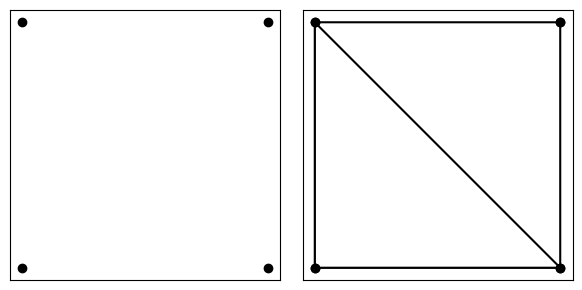

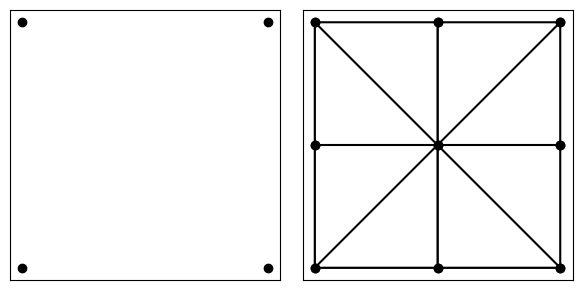

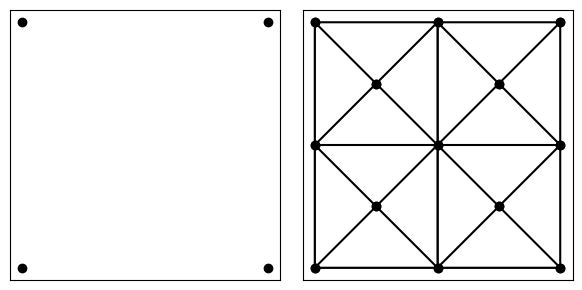

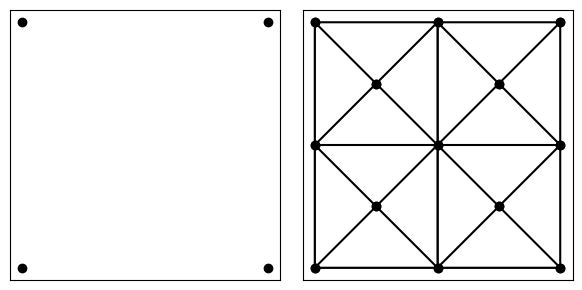

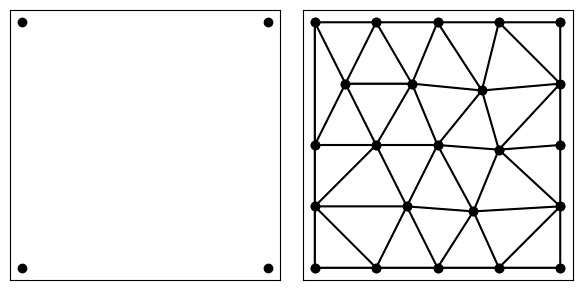

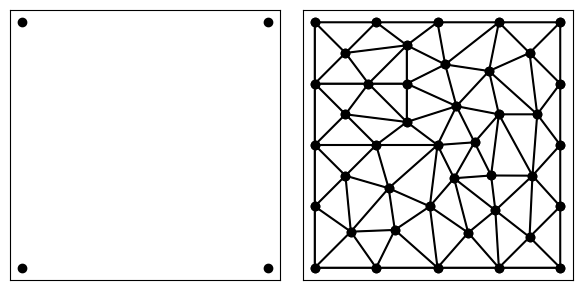

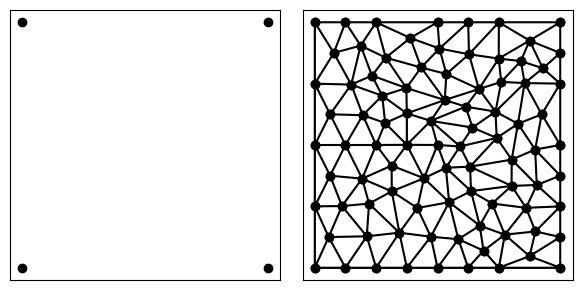

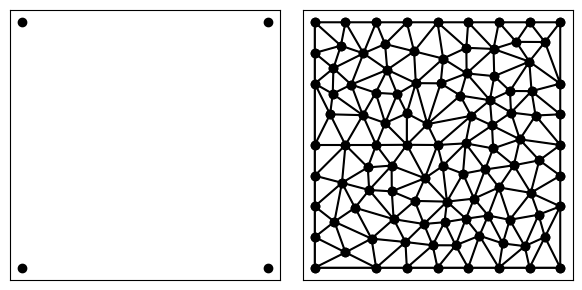

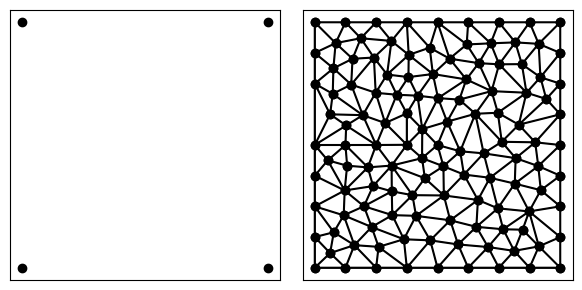

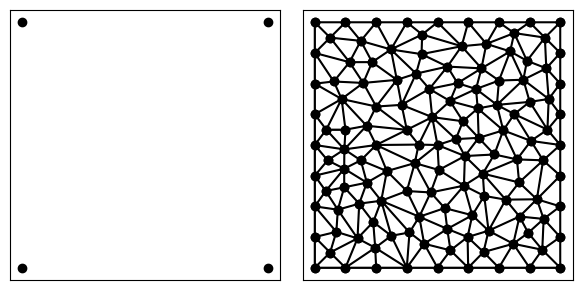

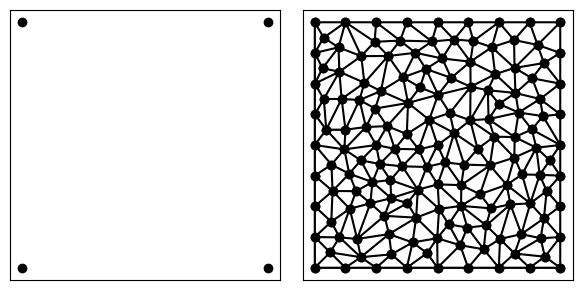

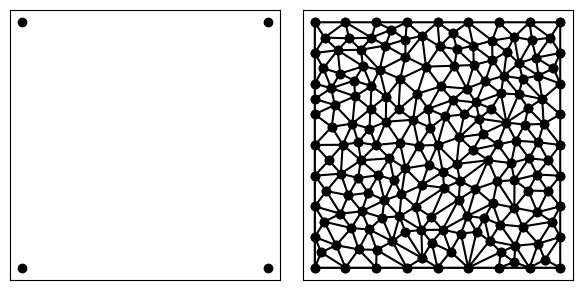

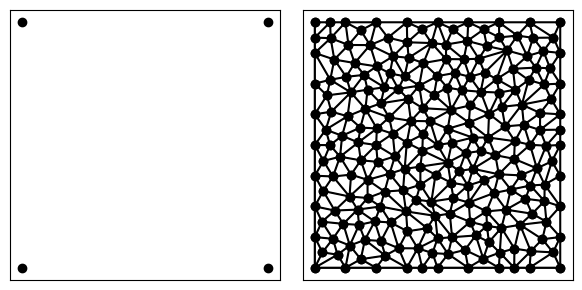

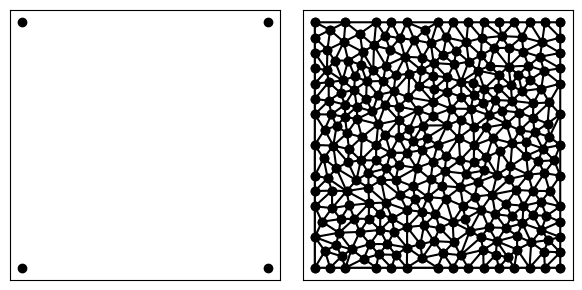

In [ ]:
def restart_model():
    model = tfk.models.Sequential()
    model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))
    return model

H1 = []
L2 = []
semi = []
h = []
for refinement in [0.5, 0.2, 0.1, 0.075, 0.05, 0.025, 0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003]:
    model = restart_model()
    mesh=generate_mesh(domain,refinement)
    vp=VPINN(pb,params,mesh,model)
    history=vp.train(1000, 0.001)

    integral,error=dblquad(lambda x,y: (u_exact(x,y)-vp.u_NN_BC(x,y))**2, 0.0, 1.0,0.0, 1.0)

    L2_error=np.sqrt(integral)

    semi_H1_err2, int_error_semi_H1 = dblquad(semi_H1_error, 0.0, 1.0, 0.0, 1.0, epsabs=5E-6)
    semi_H1_err = np.sqrt(semi_H1_err2)
    H1_err = np.sqrt(L2_error**2 + semi_H1_err**2)

    H1.append(H1_err)
    semi.append(semi_H1_err)
    L2.append(L2_error)
    a, b = find_hs(mesh)
    h.append(0.5*a + 0.5*b)
    
    

In [ ]:
h = np.array(h)

H1 = np.array(H1)
L2 = np.array(L2)
semi = np.array(semi)

H1 rate: 1.2046286416617462
L2 rate: 1.409537774413829


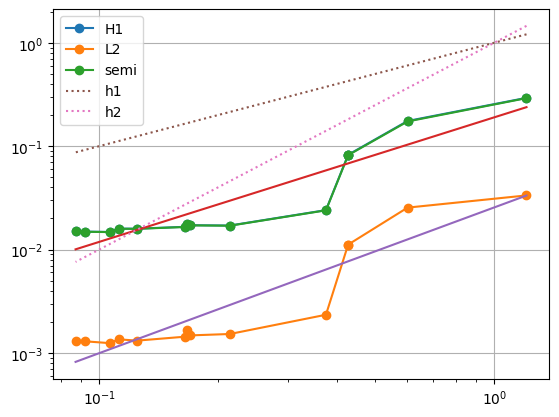

In [ ]:
# slope_H1, intercept_H1 = np.polyfit(h, H1, 1)
# slope_L2, intercept_L2 = np.polyfit(h, L2, 1)

coeffs = np.polyfit(np.log10(h), np.log10(H1), 1)
polynomial = np.poly1d(coeffs)
log10_H1_fit = polynomial(np.log10(h))

print(f"H1 rate: {coeffs[0]}")

coeffs = np.polyfit(np.log10(h), np.log10(L2), 1)
polynomial = np.poly1d(coeffs)
log10_L2_fit = polynomial(np.log10(h))

print(f"L2 rate: {coeffs[0]}")

plt.loglog(h, H1, marker='o', label='H1')
plt.loglog(h, L2, marker='o', label='L2')
plt.loglog(h, semi, marker='o', label='semi')
plt.loglog(h, 10**log10_H1_fit)
plt.loglog(h, 10**log10_L2_fit)
plt.loglog(h, h, linestyle=':', label='h1')
plt.loglog(h, h*h, linestyle=':', label='h2')
plt.grid()
plt.legend()